In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files  # чтобы загружать файлы в облако через проводник 

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas
import json

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
uploaded = files.upload() #просто запускаем и выбираем файл в проводнике

Saving submissionsWithFormsCleanLikes.json to submissionsWithFormsCleanLikes.json


In [ ]:
df = pd.read_json('/content/submissionsWithFormsCleanLikes.json')

In [ ]:
df

,id,SubmissionLikes,Category,Description,Participation,Money,Age,ContactName,LiveTime,FeatureType,GeometryType,CoordinatesLongitude,CoordinatesLatitude,CreatedAt
0,7,67,"Общественные пространства, природа и экология","Благоустроить Силинский лес: освещение, дорожк...",Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,0.000000,0.000000,2023-03-06T09:38:48.587Z
1,8,61,"Общественные пространства, природа и экология",Благоустроить Силинский лес,Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,137.041787,50.572570,2023-03-06T09:40:23.085Z
2,9,109,Дороги и транспорт,Здание автовокзала требует колоссальной реконс...,Нет,Бюджетные,25-40,Олег,Более 5 лет,Feature,Point,137.031797,50.533640,2023-03-06T09:54:31.566Z
3,10,44,"Общественные пространства, природа и экология","Ремонтируют парк очень плохо, страшно коляской...",Нет,Бюджетные,До 25,ОльгаЛ,С рождения,Feature,Point,137.026578,50.543906,2023-03-06T10:07:14.739Z
4,11,185,"Здоровье, образование, спорт и культура",Реконструкция ДК Судостроитель,Нет,Бюджетные,25-40,Александра,"Жил, но уехал",Feature,Point,137.022575,50.542521,2023-03-15T07:08:22.533Z
5,12,116,"Общественные пространства, природа и экология",привести в современное состояние парки города...,Да,Пока не знаю,40-65,Елена,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T07:23:58.030Z
6,13,123,Дороги и транспорт,Возрождение муниципального транспорта-автобусы...,Нет,Бюджетные,40-65,СЕРГЕЙ,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-15T07:27:43.646Z
7,14,152,Дороги и транспорт,Восстановить нормальную работу Комсомольского ...,Нет,Бюджетные,40-65,Елена,С рождения,Feature,Point,136.935375,50.406823,2023-03-15T07:38:16.299Z
8,15,101,"Здоровье, образование, спорт и культура",Предлагаю провести реконструкцию одной из глав...,Нет,Бюджетные,25-40,Сергей,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T08:08:30.840Z
9,16,137,Дороги и транспорт,"Учитывая, что у нас в городе с очисткой дорог...",Да,Бюджетные,40-65,Игорь,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-16T00:29:34.708Z


In [6]:
df.shape

(145, 14)

In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.2 MB/s eta 0:00:00


In [8]:
import nltk
from transformers import pipeline

# Download the necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Load the pre-trained sentiment analysis model
MODEL = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Analyze a Russian comment
# comment = "Замечательный фильм! Очень трогательный и увлекательный!"
# result = model(comment)[0]
# print(f"Comment: {comment}\nSentiment: {result['label']} ({result['score']})")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def calculate_happy(input):
    try:
        result = MODEL(input)[0]
    except Exception as e:
        # just put average if something goes wrong
        return 3
    return int(result['label'].split(' ')[0])

In [10]:
# example that everything works
calculate_happy("Замечательный фильм! Очень трогательный и увлекательный!")

5

In [11]:
df['Happy'] = df['Description'].apply(calculate_happy)

Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors


In [12]:
df['Happy'].value_counts()

5    50
4    49
1    23
2    17
3     6
Name: Happy, dtype: int64

In [13]:
import seaborn as sns

## How happy are the people in counts

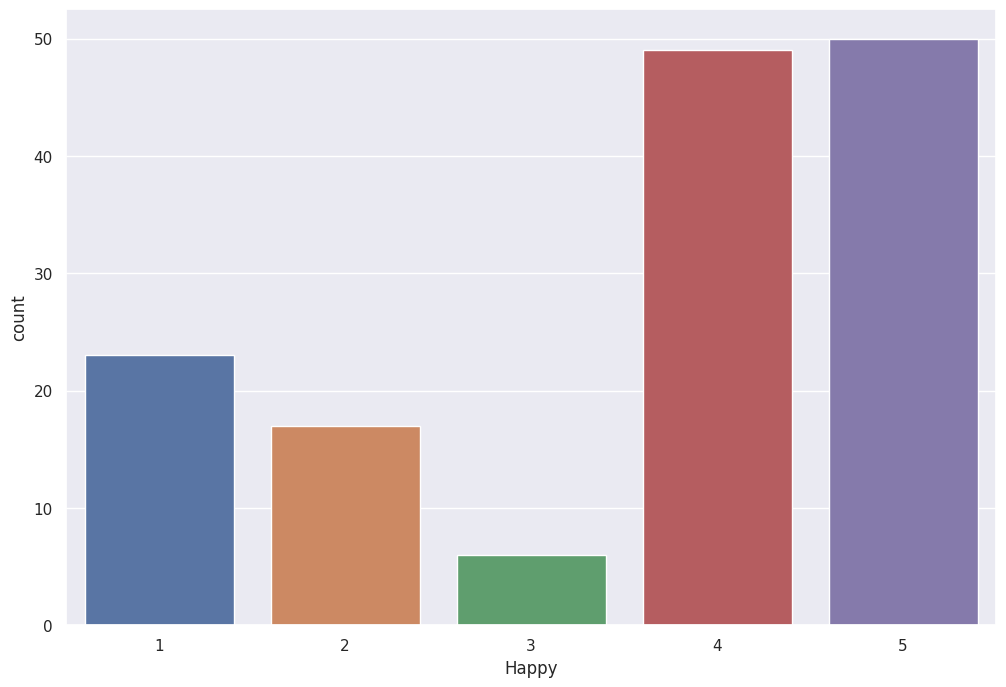

In [48]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Happy', data=df)
plt.show()

## How happy are the people in percentages

In [41]:
percentile_data_str = df.Happy.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percentile_data_int = df.Happy.value_counts(normalize=True).mul(100).round(1).astype(int)
display(percentile_data_str)

5    34.5%
4    33.8%
1    15.9%
2    11.7%
3     4.1%
Name: Happy, dtype: object

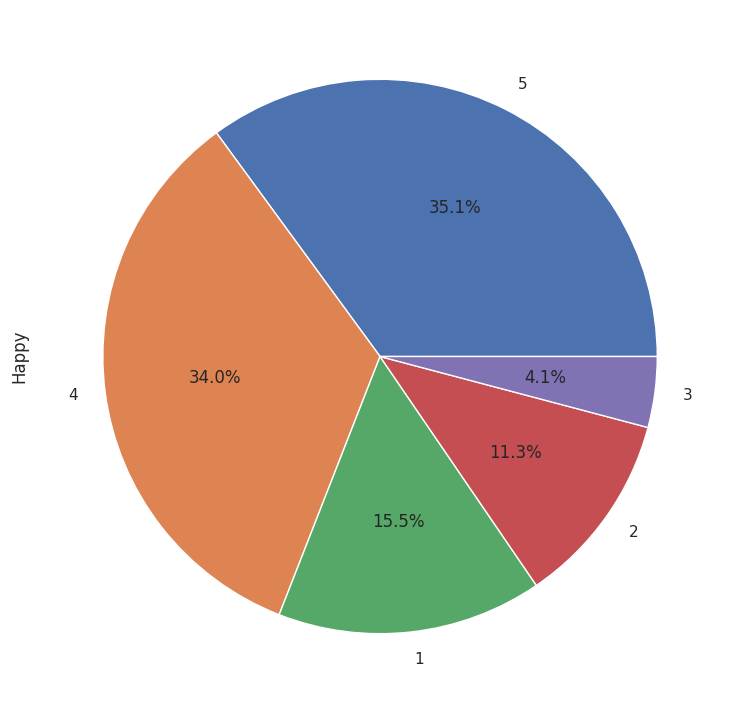

In [44]:
plt.figure(figsize=(15, 9))
percentile_data_int.plot(kind='pie', autopct='%1.1f%%')
plt.show()

## Satisfaction percentage is of 71.86%

In [22]:
# average satisfaction of the people is 3.59 about/proportional that is 71.8%
df['Happy'].mean() * 20

71.86206896551724

In [55]:
df['Category'].value_counts()

Общественные пространства, природа и экология    45
Дороги и транспорт                               34
Здоровье, образование, спорт и культура          26
Жилые дома и дворы                               19
Другое                                           16
Производство, торговля и услуги                   3
Инженерные системы города                         2
Name: Category, dtype: int64

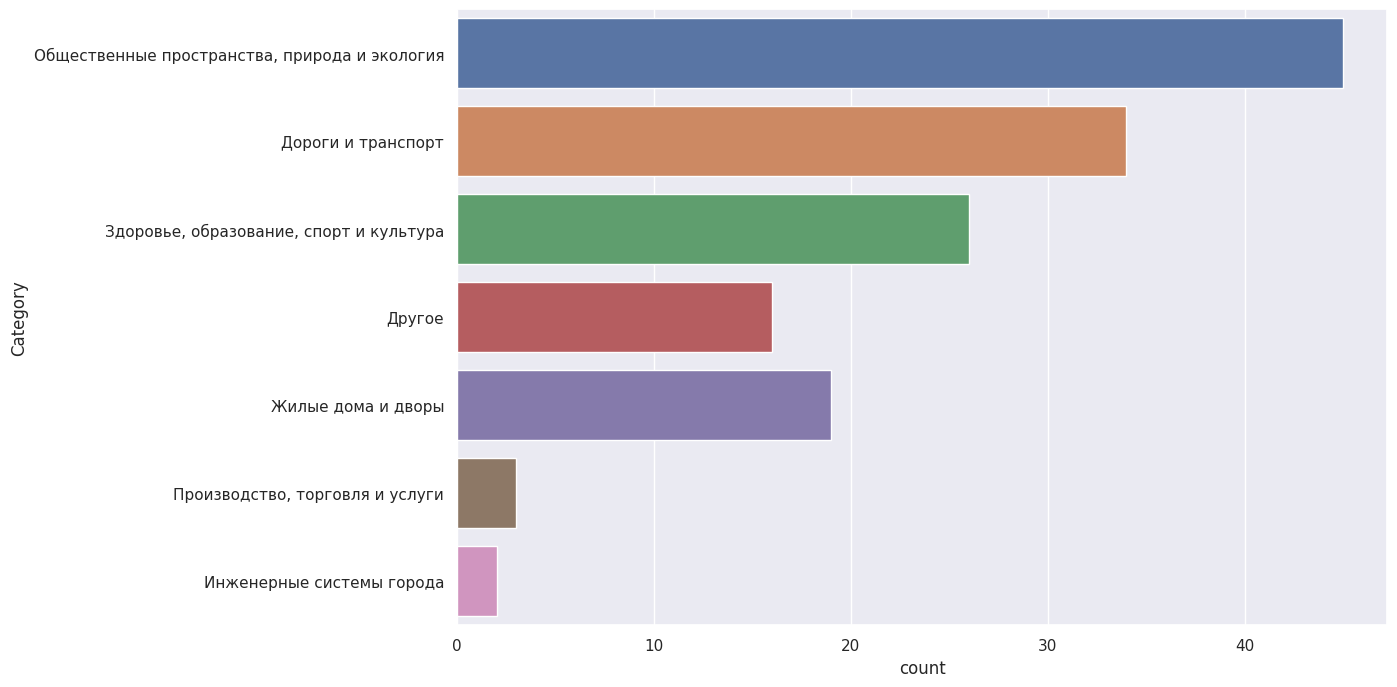

In [54]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df)
plt.show()

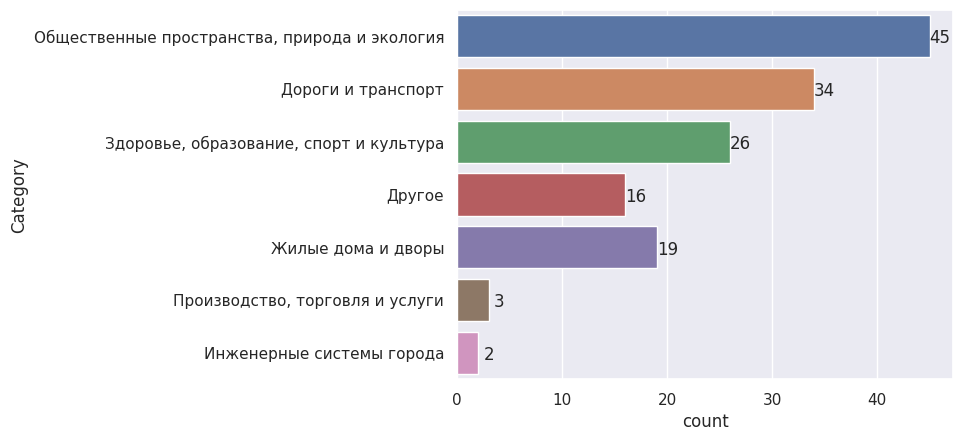

In [77]:
ax = sns.countplot(y="Category", data=df)
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
               (p.get_width() + 1, p.get_y() + p.get_height() - 0.1),
               ha = 'center', va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points')